#HW-5: Malware Classification

**Instructions:**

Suppose your company is struggling with a series of computer virus attacks for the past several months. The viruses were grouped into a few types with some effort. However, it takes a long time to sort out what kind of virus it is when been hit with. Thus, as a senior IT department member, you undertook a project to classify the virus as quickly as possible. You've been given a dataset of the features that may be handy (or not), and  also the associated virus type (target variable).

You are supposed to try different classification methods and apply best practices we have seen in the lectures such as grid search, cross validation, regularization etc. To increase your grade you can add more elaboration such as using ensembling or exploiting feature selection/extraction techniques. **An evaluation rubric is provided.**

Please prepare a python notebook that describes the steps, present the results as well as your comments.

You can download the data (csv file)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics

In [ ]:
df = pd.read_csv('hw5_data.csv')

I tried to shorten the time quite a bit because I had problems as the training time got longer in Colab, so I proceeded by using a sample from the data. In order to reduce the training time, I reduced the number of rows in the dataset with a random selection.

In [ ]:
df = df.sample(frac=0.025)

In [ ]:
df

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
3391,3.0,3.0,2091.0,21.000000,7.0,4035.000000,7.0,19.0,10.000000,46.0,...,18212.983176,106337.775924,67100.247626,16405.676519,27805.574499,-35794.084701,-97220.374394,21876.000000,18434.0,2
2304,3.0,3.0,524.0,12.000000,4.0,1531.000000,4.0,2.0,1.000000,13.0,...,120644.694404,-17003.846071,-139864.026190,-2771.818728,-101191.754673,102824.693334,-196943.897687,7764.000000,6581.0,8
1197,3.0,3.0,528.0,2765.824233,5.0,1576.000000,5.0,6.0,68431.698364,30.0,...,98126.790003,-199544.151843,37512.711100,-31327.030319,50290.738429,83105.400163,-28737.766020,7681.000000,5908.0,8
3740,3.0,3.0,547.0,15.000000,5.0,1574.000000,5.0,6.0,7.000000,30.0,...,-32798.235424,104116.259102,-83129.085289,12685.863019,80126.902221,-40249.088301,-42316.328290,7666.000000,6442.0,9
1964,3.0,3.0,21.0,12.000000,4.0,17.000000,4.0,11.0,0.000000,11.0,...,-62807.837180,55738.021899,-102132.572944,34975.159936,43602.010752,-108665.335417,191495.310819,72176.000000,68037.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,3.0,3.0,15.0,12.000000,4.0,15.000000,4.0,9.0,0.000000,16.0,...,185676.210287,171707.944095,-73792.647359,35597.619836,-160161.744730,91173.328878,88329.486873,95417.916534,68244.0,3
3519,3.0,3.0,23.0,12.000000,4.0,55869.152345,4.0,11.0,0.000000,11.0,...,30726.521262,102543.453989,229192.343948,95480.197218,318062.432053,-7006.286145,17581.019284,71644.000000,68124.0,3
613,3.0,3.0,681.0,21.000000,7.0,573.000000,7.0,24.0,73760.656467,61.0,...,68356.431268,-77412.968561,109992.222007,48641.999063,-27875.110365,26929.335794,-75896.110175,242036.000000,191487.0,2
1612,3.0,3.0,476.0,12.000000,4.0,430.000000,4.0,12.0,41821.475328,17.0,...,-53273.358823,75096.257997,156237.543925,84702.621369,-57781.611903,89720.411587,132076.069932,235174.000000,152325.0,2


In [ ]:
df.data=df.columns.drop('target')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
features=df.data

In [ ]:
x=df[features]

In [ ]:
y=df.target

In [ ]:
x.shape

(125, 1804)

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.2, random_state=0)
X_train.shape

(100, 1804)

In [ ]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [ ]:
X_train.shape

(100, 1804)

MI<br>
I calculated Mutual information to find the features most correlated with the classes. When we look at the mutual information graph below, it seems more logical to use 40% features with high MI value for training, but since my aim was to try more than one model and also because I had limited time, I took the 2% that was most correlated with the class values and used it for train.

In [ ]:
mi=mutual_info_classif(X_train,Y_train)

In [ ]:
len(mi)

1804

In [ ]:
mi = pd.Series(mi)
mi.index = X_train.columns

In [ ]:
mi.sort_values(ascending=False, inplace = True)

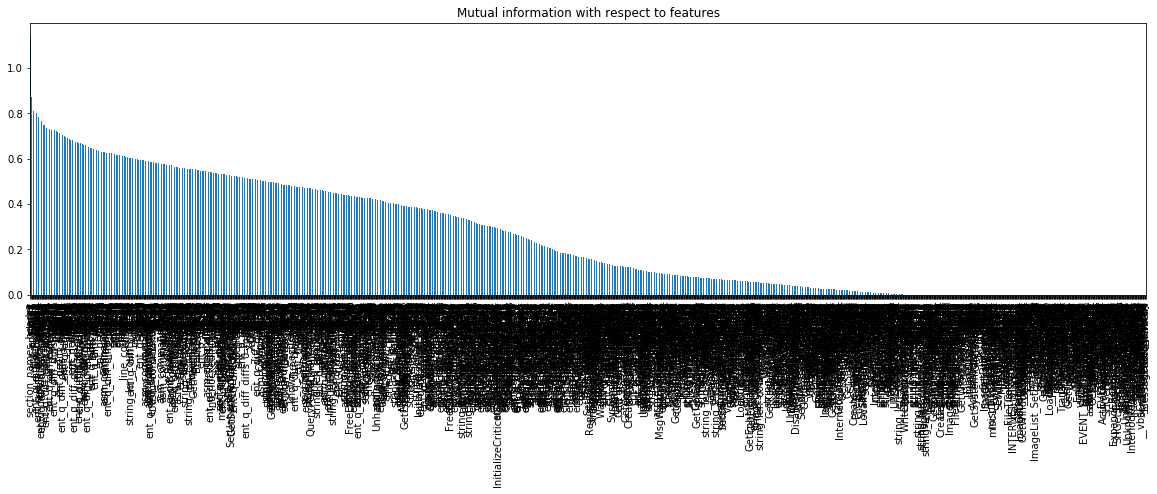

In [ ]:
plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (20,5))
plt.show()

In [ ]:
sel = SelectPercentile(mutual_info_classif, percentile=2).fit(X_train, Y_train)
X_train.columns[sel.get_support()]

Index(['BYTES', 'DATA', 'ent_q_diffs_median', 'ent_q_diff_diffs_max-min',
       'ent_q_diff_block_0_18', 'ent_q_diff_diffs_0_mean',
       'ent_q_diff_diffs_2_median', 'ent_q_diff_diffs_2_min',
       'ent_q_diff_diffs_2_max-min', 'ent_p_1', 'ent_p_2', 'ent_p_3',
       'ent_p_11', 'ent_p_12', 'ent_p_diffs_3', 'ent_p_diffs_4',
       'ent_p_diffs_5', 'section_names_header', '_initterm', 'exit', 'TB_44',
       'TB_45', 'TB_55', 'TB_9f', 'Img1', 'Img2', 'Img4', 'Img9', 'Img12',
       'Img13', 'Img15', 'Img17', 'Img35', 'Img39', 'Img40', 'Img41', 'Img43'],
      dtype='object')

In [ ]:
len(X_train.columns[sel.get_support()])

37

In [ ]:
X_train_mi = sel.transform(X_train)
X_test_mi = sel.transform(X_test)
X_train_mi.shape

(100, 37)

Support Vector Machine<br>I tried the support vector machine method as the first model. First, I implemented the model using deafult parameters in the linear kernel. Then I took the best parameters using GridSearchCV and used the model in that way and calculated the scores when k-fold cross validation was applied. Accuracy increased when cross validation is applied.

In [ ]:
clf = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.56


In [ ]:
grid_parameters={'C':[0.1, 1 ,10, 1000], 'kernel':['rbf', 'poly', 'sigmoid', 'linear'], 'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVC(), grid_parameters)
Model_s=grid.fit(X_train,Y_train)
grid

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'degree': 1, 'kernel': 'linear'}
0.68


In [ ]:
svc_best=SVC(C=0.1, degree=1, kernel='linear')
svc_best.fit(X_train, Y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print('Test set score: ', accuracy_score(Y_test, svc_best.predict(X_test)))

Test set score:  0.56


In [ ]:
scores=cross_val_score(Model_s,x,y,cv=5)
scores

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than

array([0.68, 0.64, 0.48, 0.68, 0.8 ])

In [ ]:
print("Avg Acc: " , scores.mean() , " std dev: ", scores.std(), " max: ", scores.max())

Avg Acc:  0.68  std dev:  0.08124038404635961  max:  0.8


KNN<br>I chose KNN as another calssification model. First I applied the model with the default parameters and then I applied the model using the best parameters I got with GridSearchCV.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.56


In [ ]:
grid_parametersK = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gridK = GridSearchCV(KNeighborsClassifier(), grid_parametersK, verbose = 1, cv=3, n_jobs = -1)
g_knn = gridK.fit(X_train, Y_train)



Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   36.2s finished


In [ ]:
print(g_knn.best_score_)
print(g_knn.best_params_)

0.6316102198455139
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(Y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(Y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.64


In [ ]:
scoresK = cross_val_score(knn, x, y, cv =5)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.624


Random Forest Classifier<br>I used Random Forest method in this part. First I applied the model using the default hyperparameters and then using the parameters that gave the best results I got with GridSearch.

In [ ]:
Rforest=RandomForestClassifier(random_state=6)

In [ ]:
Rforest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [ ]:
Rforest.score(X_test,Y_test)

0.84

In [ ]:
RFC=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_RFC = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5)
grid_RFC.fit(X_train, Y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
grid_RFC.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
RFC_b=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
RFC_b.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
predict_RF=RFC_b.predict(X_test)

In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(Y_test,predict_RF))

Accuracy for Random Forest on CV data:  0.84


Logistic Regression<br>
I applied the logistic regression model first with the default hyperparameters and then with the best parameters I got.

In [ ]:
lr = LogisticRegression(C=0.01, max_iter=1000)
lr.fit(X_train, Y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict_lr=lr.predict(X_test)
print(lr.score)
print(accuracy_score(Y_test,predict_lr))

<bound method ClassifierMixin.score of LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>
0.64


In [ ]:
param_grid_lr = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
grid_lr = GridSearchCV(lr, param_grid = param_grid_lr, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
grid_lr_b = grid_lr.fit(X_train,Y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 54.8min finished


In [ ]:
print(grid_lr_b.best_params_)

{'C': 78.47599703514607,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [ ]:
lr_best=LogisticRegression(C=78.475, max_iter=100, penalty='l2', solver='newton-cg')
lr_best.fit(X_train, Y_train)


C:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=78.475, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict_lrB=lr_best.predict(X_test)

In [ ]:
print("Accuracy for Logistic Rgeression on CV data: ",accuracy_score(Y_test,predict_lrB))

Accuracy for Logistic Rgeression on CV data:  0.56


Ensembling<br>
I used voting classification to ensemble the 3 model: SVM, KNN, LR.

In [ ]:
estimator = []
estimator.append(('LR',LogisticRegression(C=78.475, max_iter=100, penalty='l2', solver='newton-cg')))
estimator.append(('SVC', SVC(C=0.1, degree=1, kernel='linear')))
estimator.append(('KNN',  KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')))

In [ ]:
hard_voting = VotingClassifier(estimators = estimator, voting ='hard')
hard_voting.fit(X_train, Y_train)
y_pred_ens = hard_voting.predict(X_test)

C:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [ ]:
score_ens = accuracy_score(Y_test, y_pred_ens)
print("Hard Voting Score:" ,score_ens)

Hard Voting Score: 0.6


As a result, Random Forest Classifier was the most accurate among the models I applied. In order to do the Malware Classification process in this assignment, I will prefer the model random forest classifier, according to the results I have obtained. Of course, there are models that I have not tried and under normal conditions, they should also be considered.<br>
Also, models in general did not get high accuracy values because I shrunk the data considerably to keep my train time short, which reduced model accuracies.I randomly selected the sample data to reduce the number of rows. This caused some classes to be less numerous in the dataset than others. This was one of the biggest factors that lowered the accuracy value.